# Projeto para Departamento de Recursos Humanos

Este projeto tem como objetivo prever se um funcionário está propenso a deixar a empresa. Para isso, é utilizado um modelo de regressão logística, treinado em uma base de dados com dados de funcionários de uma empresa.


## Importação das bibliotecas e base de dados

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
- Cálculo de salário: https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary e https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary-
- Stock: https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20they%20are%20granted%20to,a%20specific%20period%20of%20time.

In [4]:
# Bibliotecas que serão utilizadas no projeto

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Importando base de dados em csv e transformando em um dataframe python

employee_df = pd.read_csv('Human_Resources.csv')

In [6]:
# Número de linha e colunas da base de dados

employee_df.shape

(1470, 35)

In [7]:
# Verificação das primeiras 5 linhas da base de dados:

employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Sobre a base de dados**


**Education:**
1 'Below College',
2 'College',
3 'Bachelor',
4 'Master',
5 'Doctor'


**EnvironmentSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'


**JobInvolvement:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'


**JobSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'


**PerformanceRating:**
1 'Low',
2 'Good',
3 'Excellent',
4 'Outstanding'


**RelationshipSatisfaction:**
1 'Low',
2 'Medium',
3 'High',
4 'Very High'


**WorkLifeBalance:**
1 'Bad',
2 'Good',
3 'Better',
4 'Best'

O atributo **Attrition** será a classe que vamos querer prever. Em tradução livre, quer dizer se o funcionário possui atrito, ou seja, se está propenso a deixar a empresa

In [ ]:
# Informações gerais sobre a base de dados:

employee_df.info()

In [ ]:
# Estatísticas descritivas dos dados:

employee_df.describe()

## Visualização dos dados

**Preparação dos Dados**

Para facilitar a análise e o treinamento do modelo, algumas transformações nos dados foram realizadas:

In [10]:
# Conversão da coluna "Attrition" para valores binários (0 para "No" e 1 para "Yes"):

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
# Conversão das colunas "OverTime" e "Over18" para valores binários:

employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
employee_df.head(5)

**Análise e Visualização dos Dados**


Foram realizadas diversas análises e visualizações dos dados para entender melhor o comportamento dos funcionários e identificar padrões que possam influenciar na decisão de deixar a empresa.

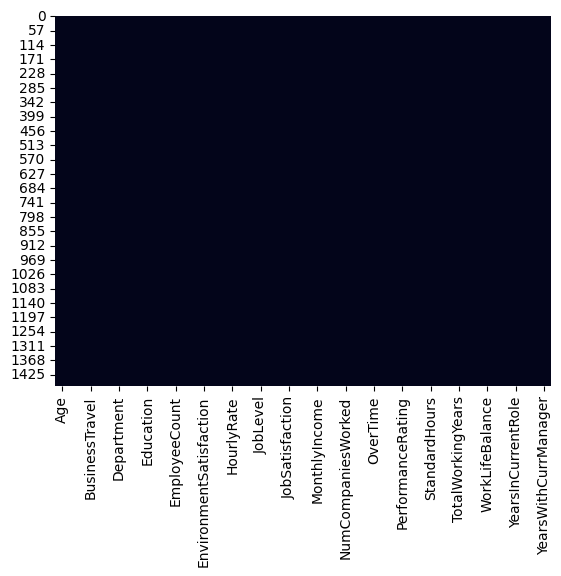

In [13]:
# Heatmap de valores nulos na base de dados:

sns.heatmap(employee_df.isnull(), cbar = False);

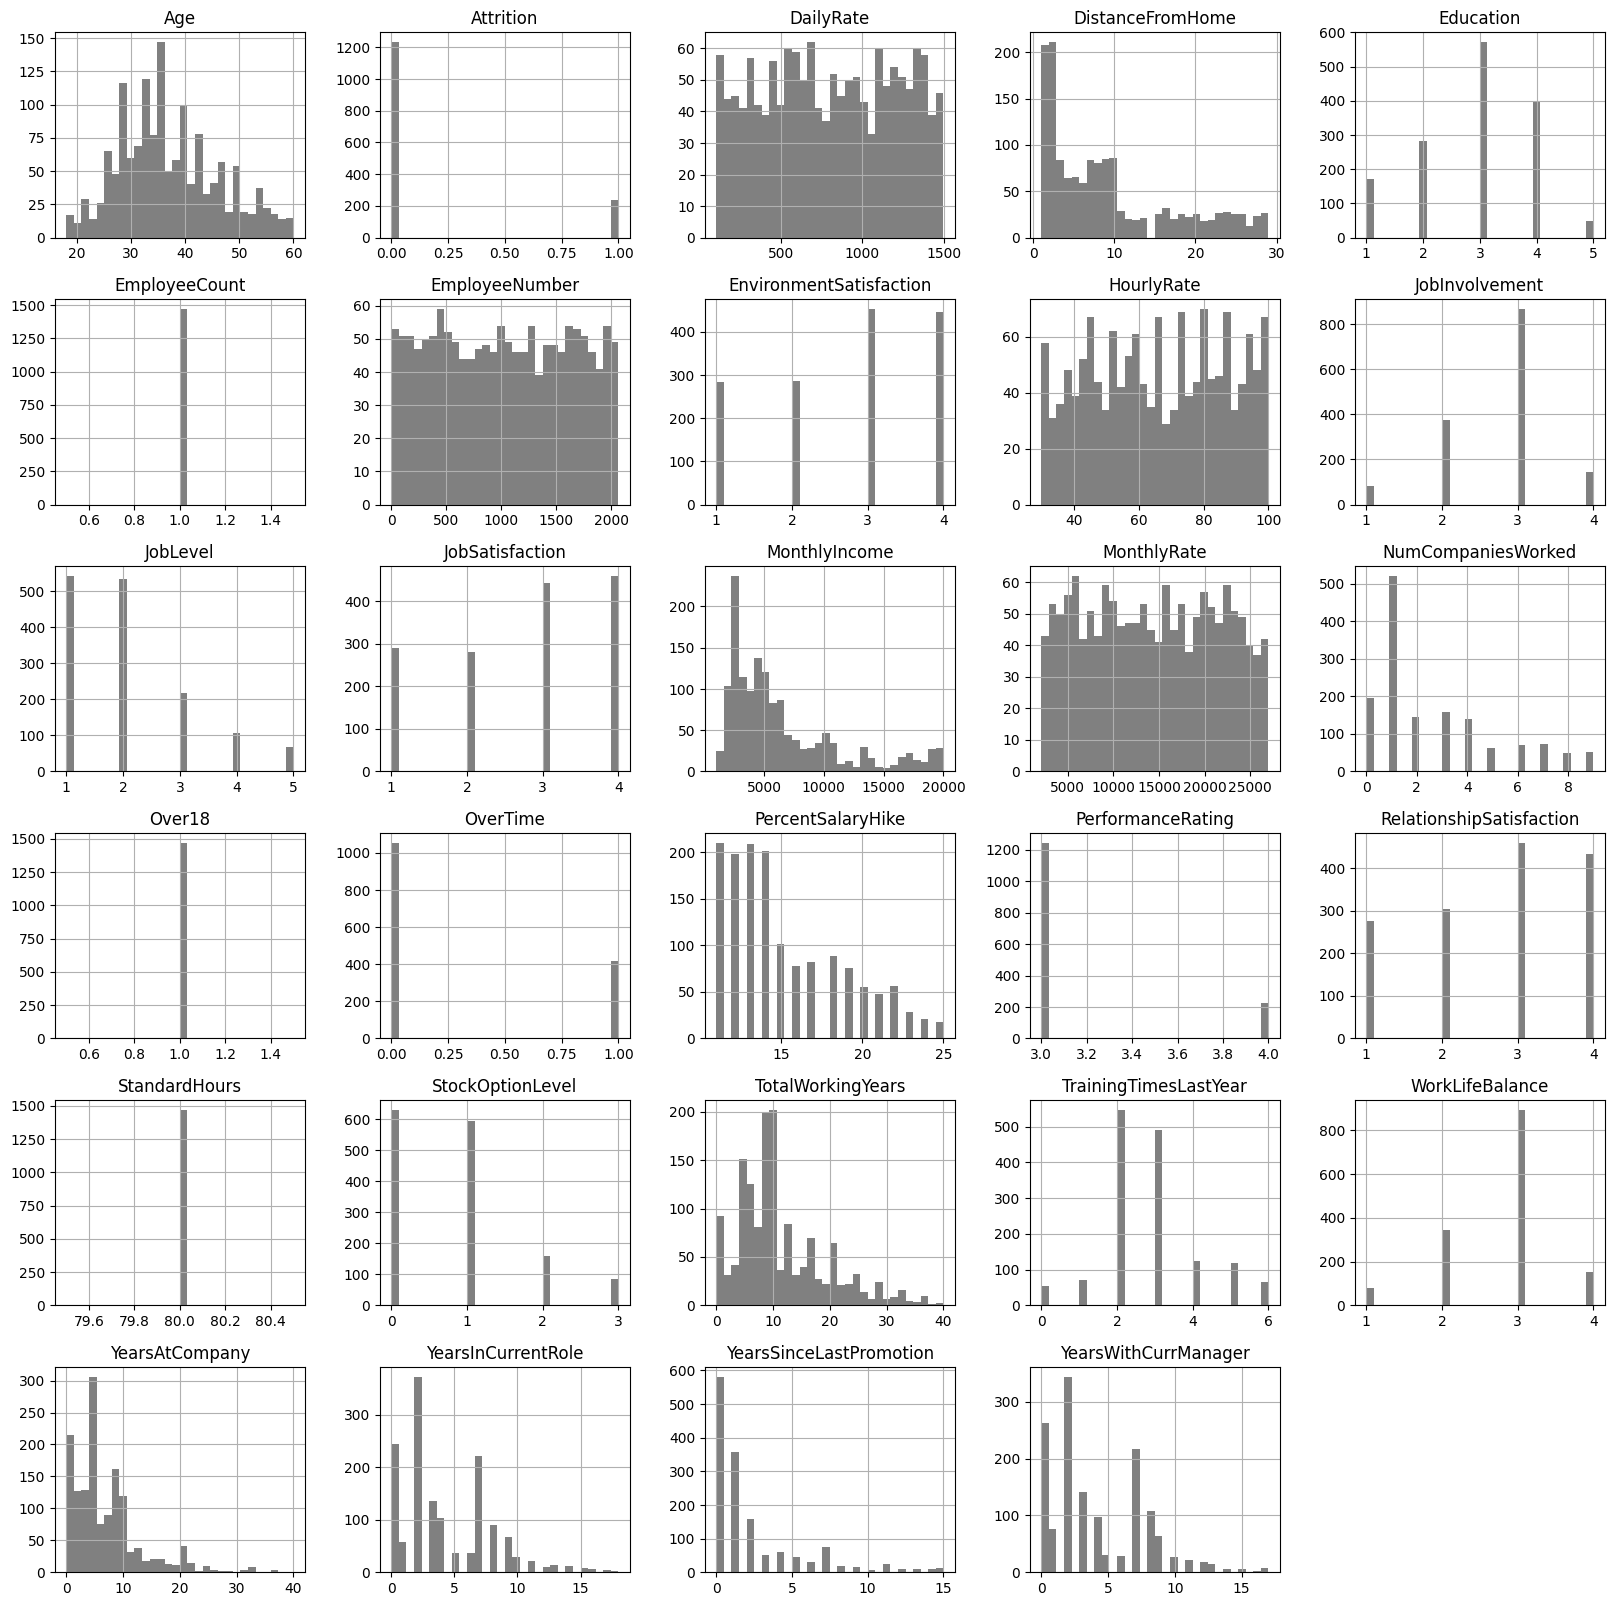

In [14]:
# Histogramas para variáveis numéricas:

employee_df.hist(bins=30, figsize=(20,20), color = 'gray');

In [15]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [16]:
employee_df.head(5), employee_df.shape

(   Age  Attrition     BusinessTravel  DailyRate              Department  \
 0   41          1      Travel_Rarely       1102                   Sales   
 1   49          0  Travel_Frequently        279  Research & Development   
 2   37          1      Travel_Rarely       1373  Research & Development   
 3   33          0  Travel_Frequently       1392  Research & Development   
 4   27          0      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
 0                 1          2  Life Sciences                        2   
 1                 8          1  Life Sciences                        3   
 2                 2          2          Other                        4   
 3                 3          4  Life Sciences                        4   
 4                 2          1        Medical                        1   
 
    Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
 0  Fema

In [17]:
# Contagem de funcionários que saíram e ficaram na empresa:

left_df = employee_df[employee_df['Attrition' ] == 1]
stayed_df = employee_df[employee_df['Attrition' ] == 0]

In [18]:
print('Total = ', len(employee_df),'\n')
print('Número de funcionários que saíram da empresa = ', len(left_df),'\n')
print('Porcentagem de funcionários que saíram da empresa = ', (len(left_df) / len(employee_df)) * 100,'\n')
print('Número de funcionários que ficaram na empresa = ', len(stayed_df),'\n')
print('Porcentagem de funcionários que ficaram na empresa = ', (len(stayed_df) / len(employee_df)) * 100,'\n')

Total =  1470 

Número de funcionários que saíram da empresa =  237 

Porcentagem de funcionários que saíram da empresa =  16.122448979591837 

Número de funcionários que ficaram na empresa =  1233 

Porcentagem de funcionários que ficaram na empresa =  83.87755102040816 



In [19]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [20]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<ipython-input-21-1bd01a3fa958>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = employee_df.corr()


<Axes: >

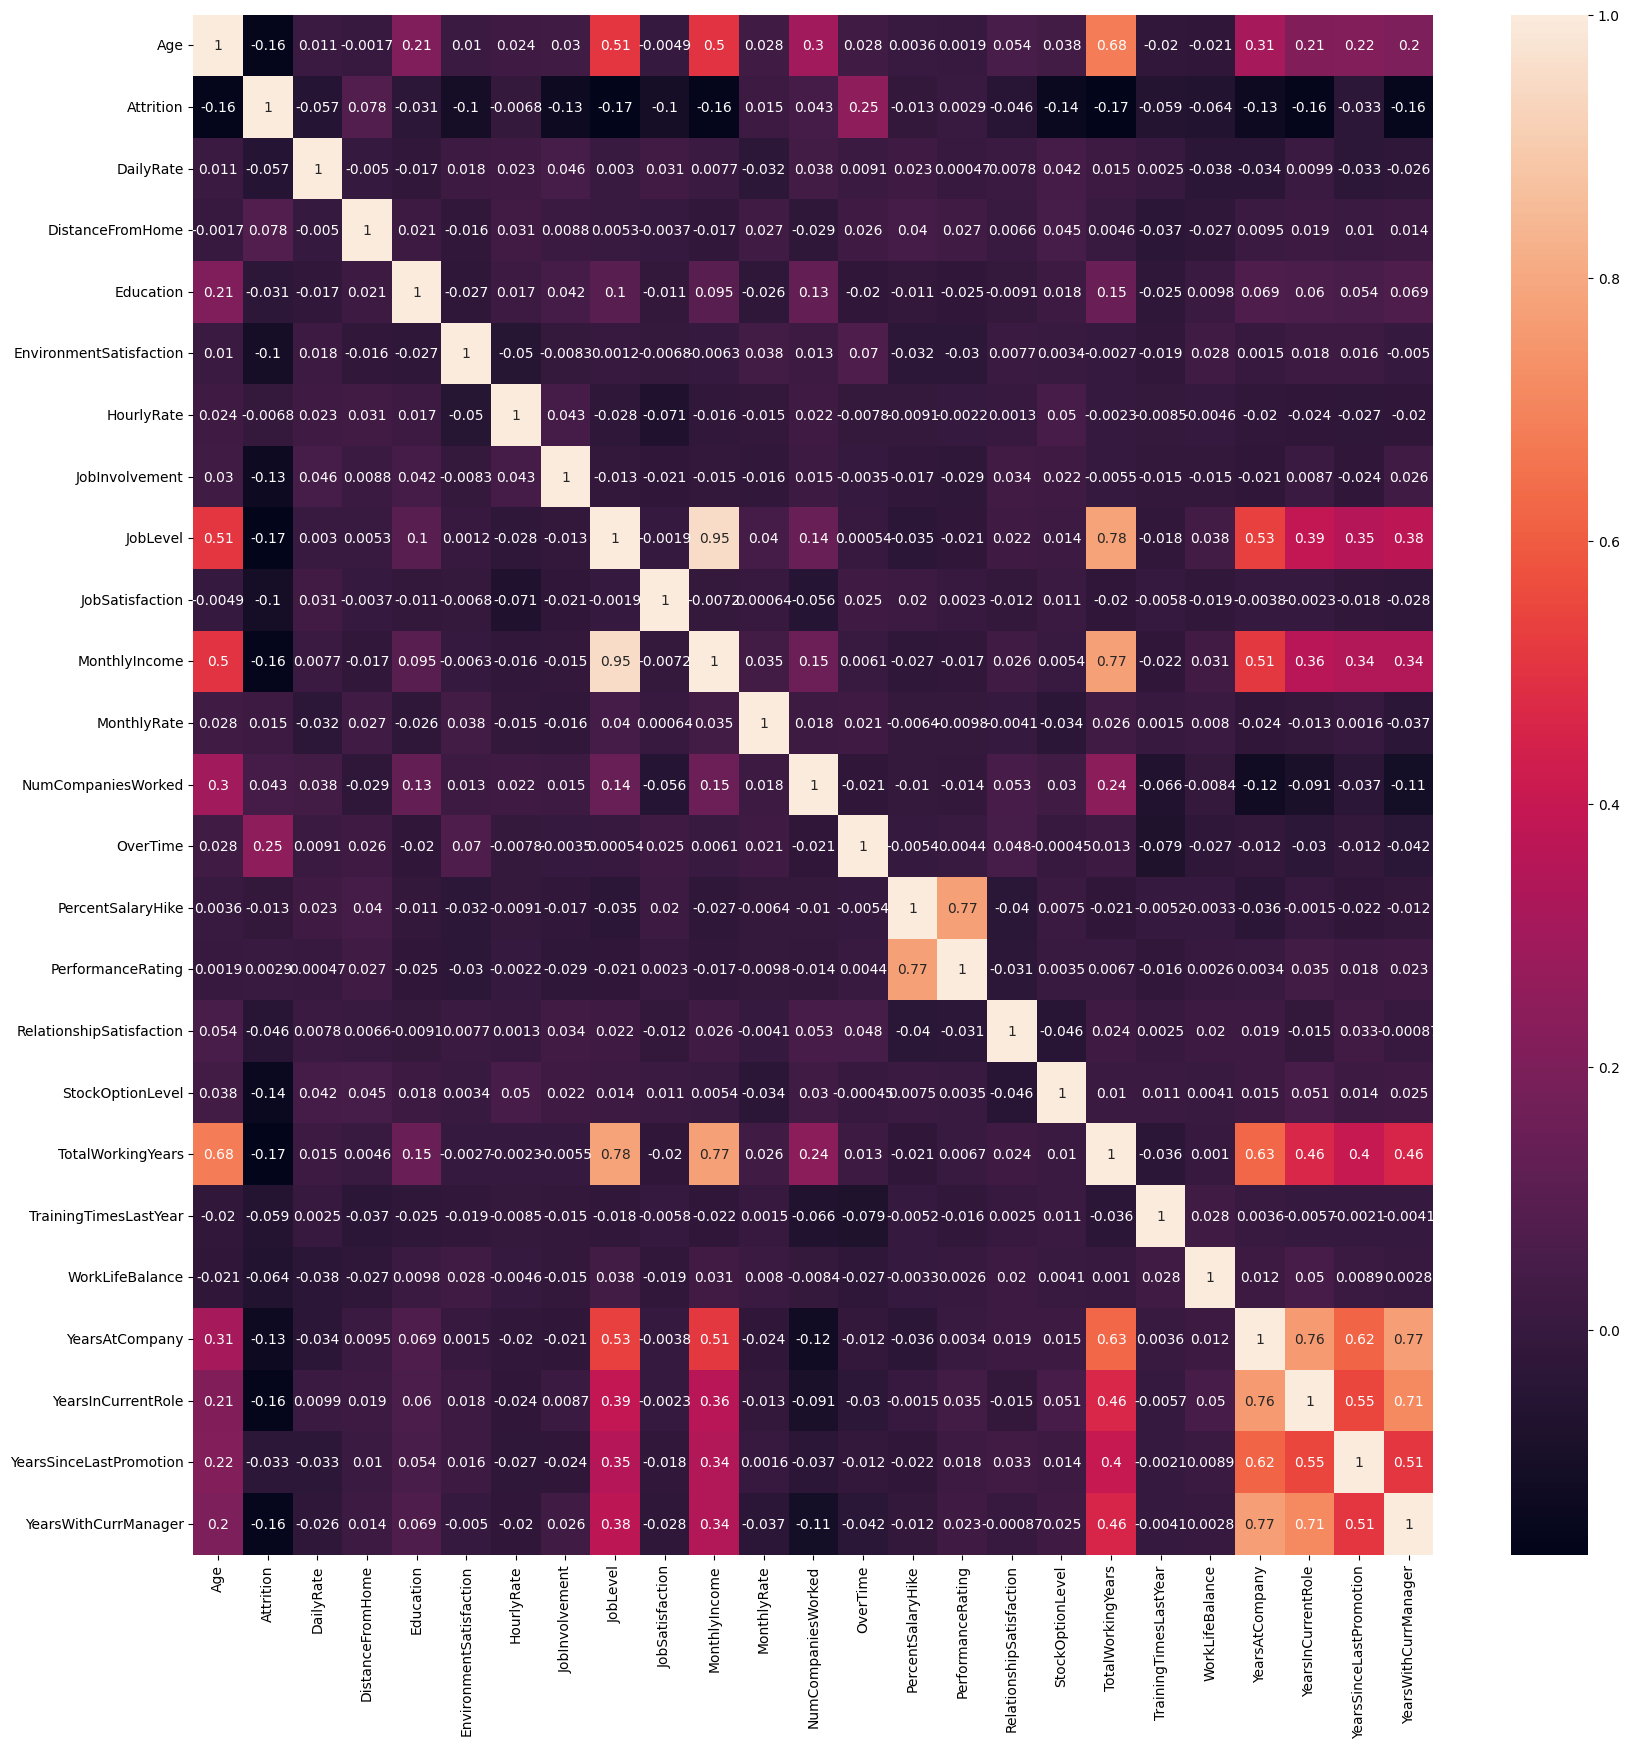

In [21]:
# Matriz de correlação entre variáveis:

correlations = employee_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

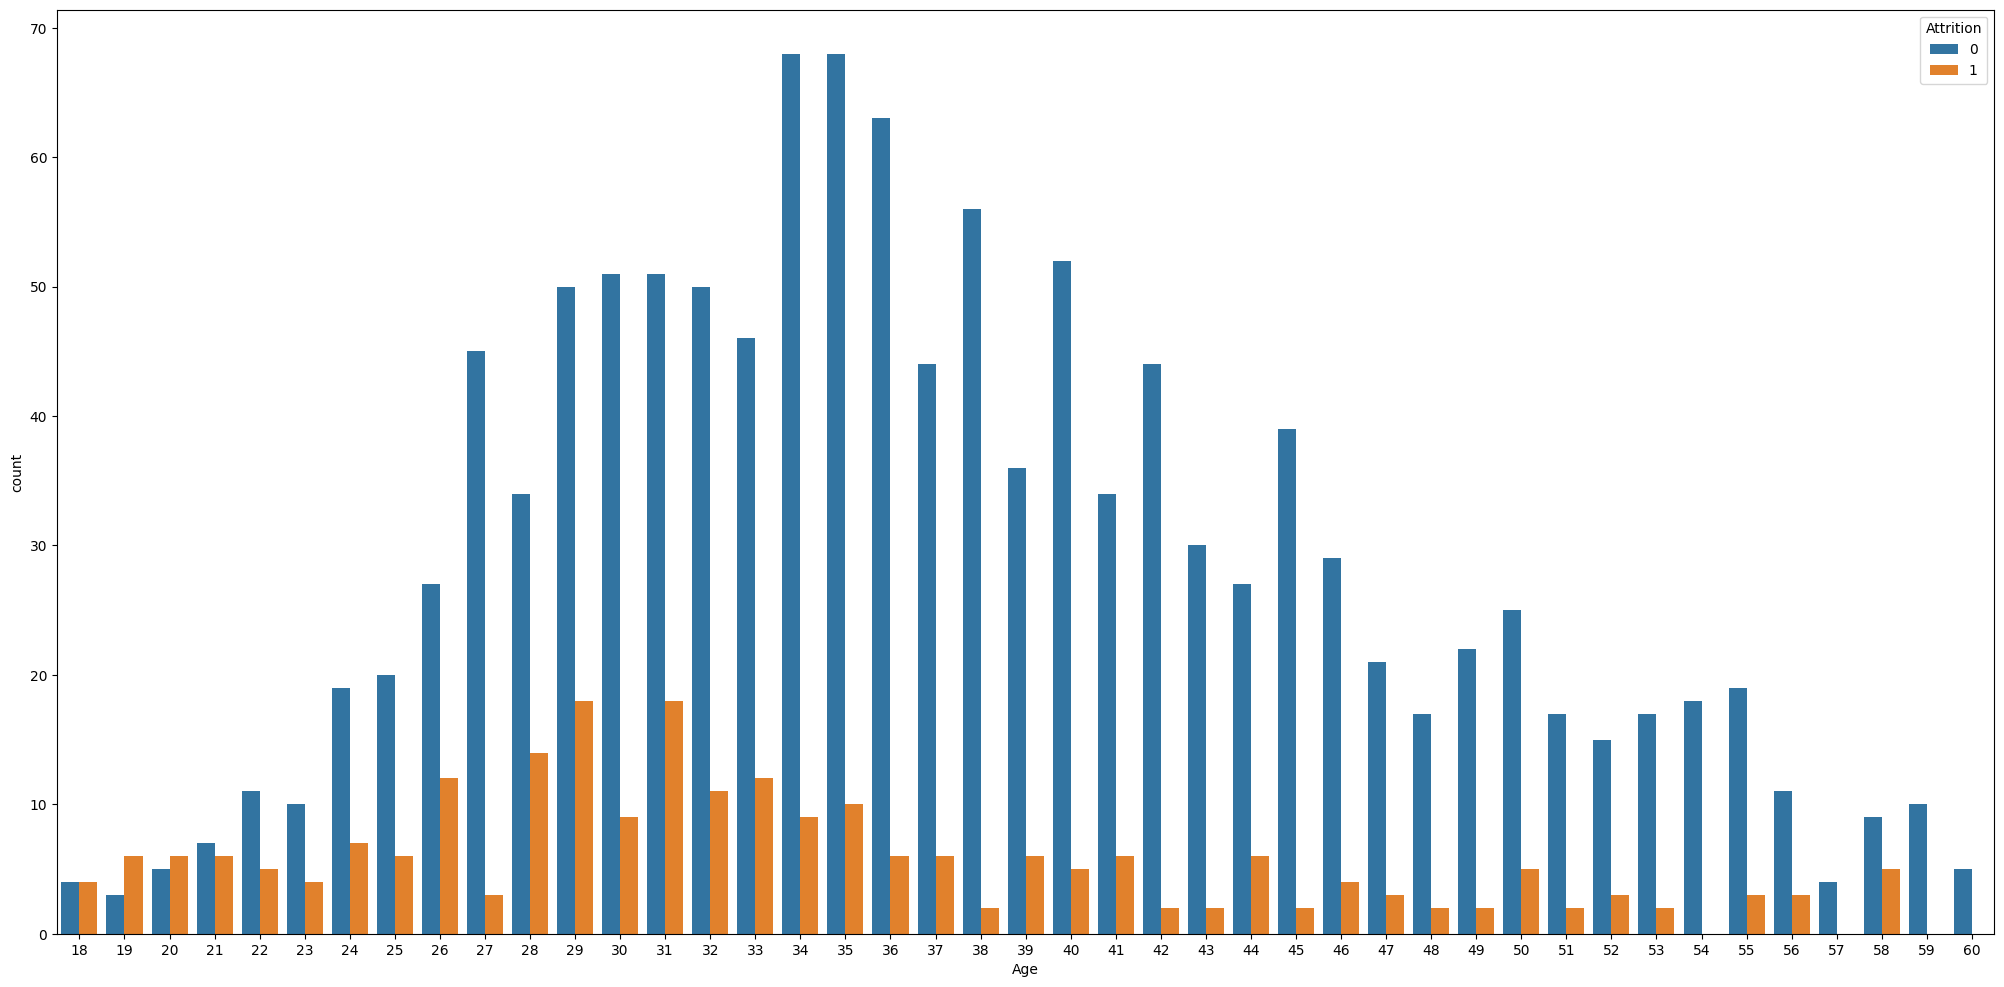

In [22]:
# Contagem de funcionários que saíram ou ficaram em relação à idade:

plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data=employee_df);

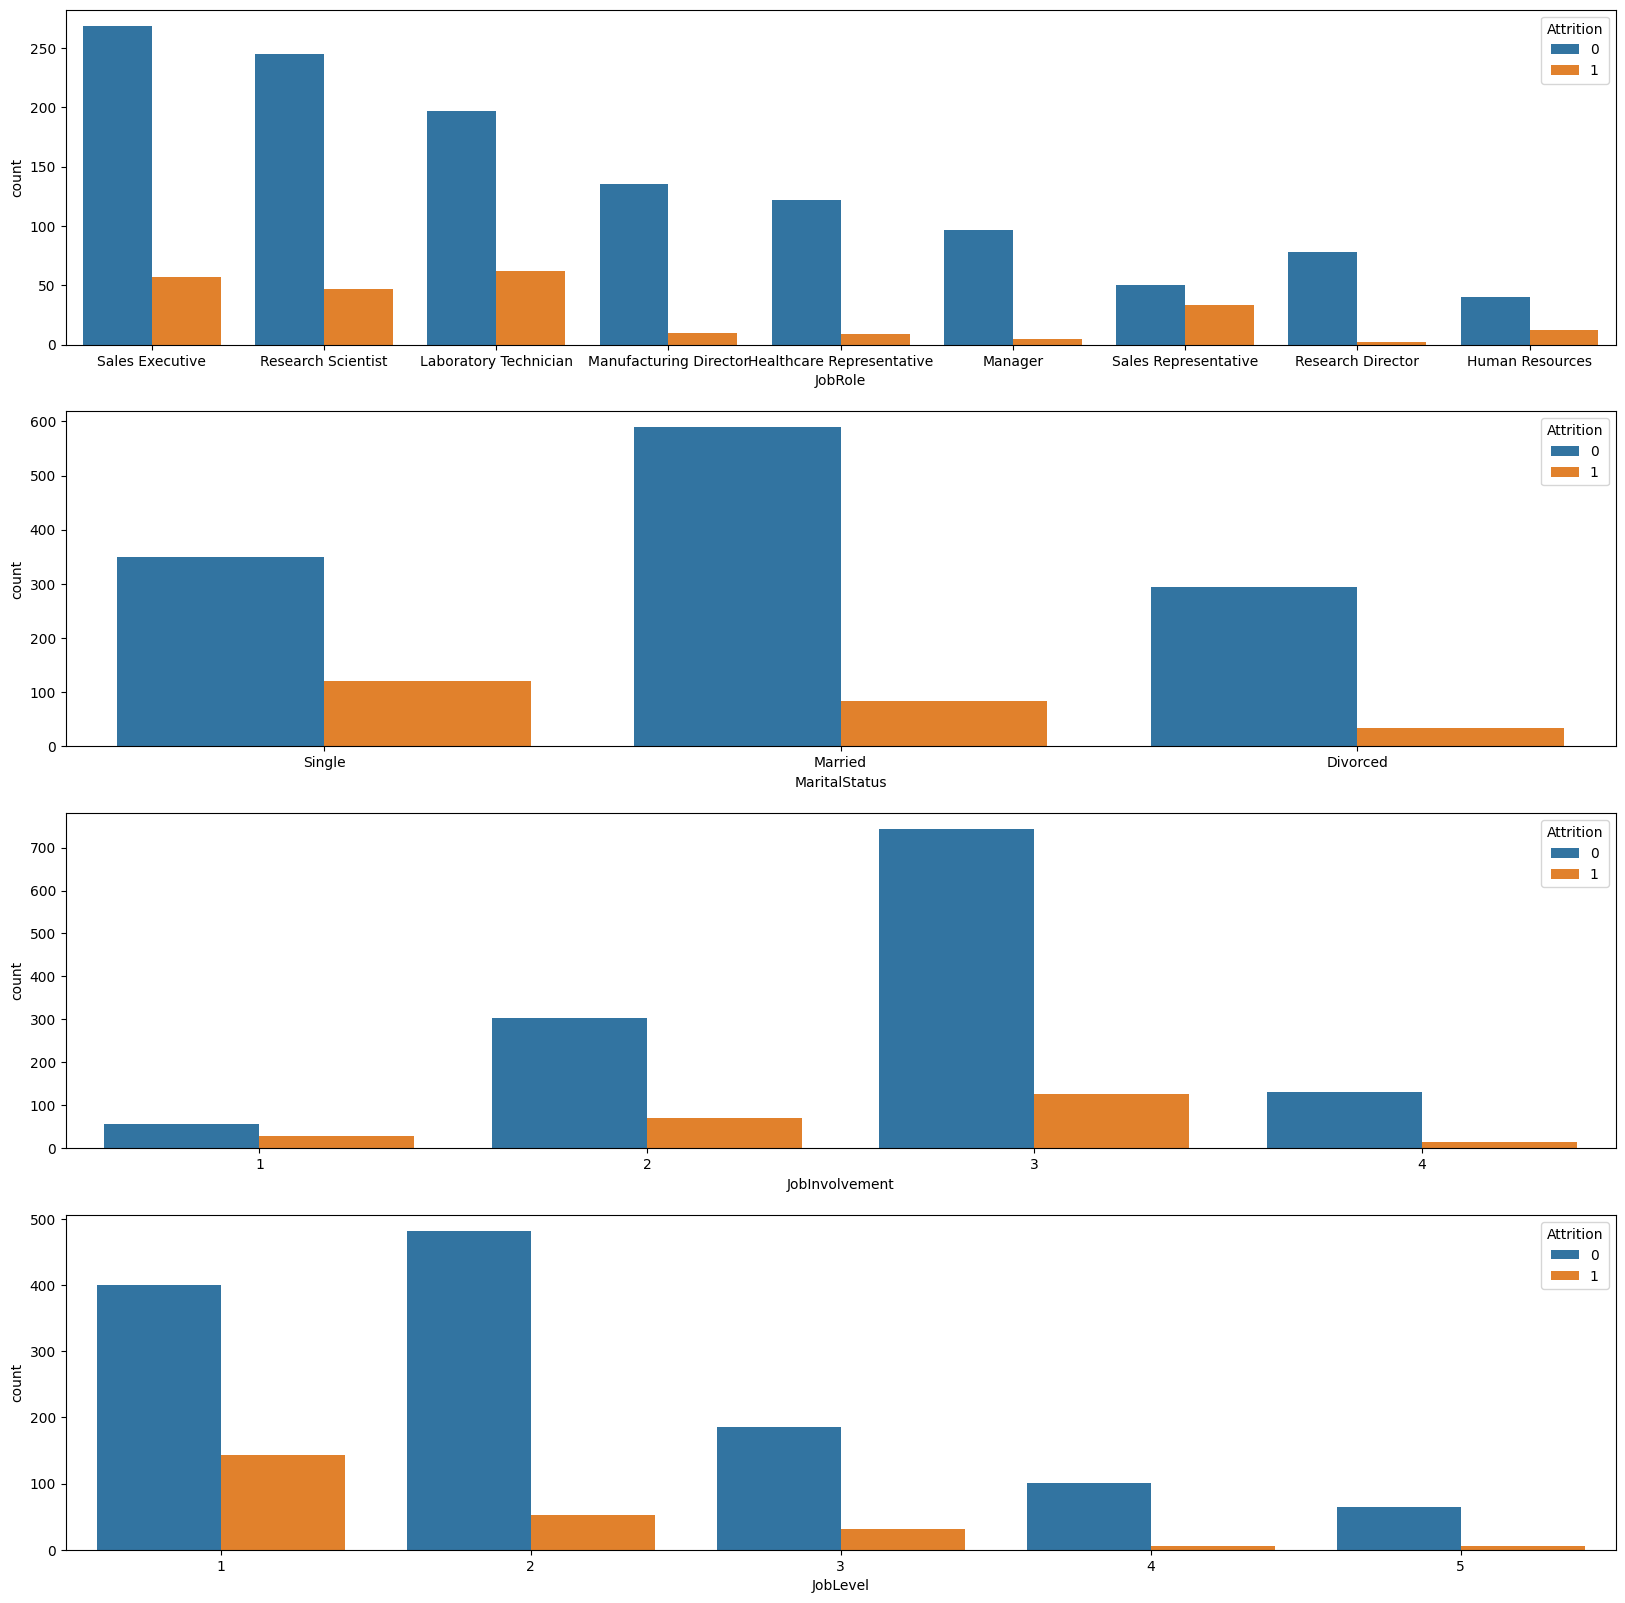

In [23]:
# Contagem de funcionários que saíram ou ficaram em relação ao cargo e estado civil:

plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole', hue = 'Attrition', data = employee_df);
plt.subplot(412)
sns.countplot(x='MaritalStatus', hue = 'Attrition', data = employee_df);
plt.subplot(413)
sns.countplot(x='JobInvolvement', hue = 'Attrition', data = employee_df);
plt.subplot(414)
sns.countplot(x='JobLevel', hue = 'Attrition', data = employee_df);

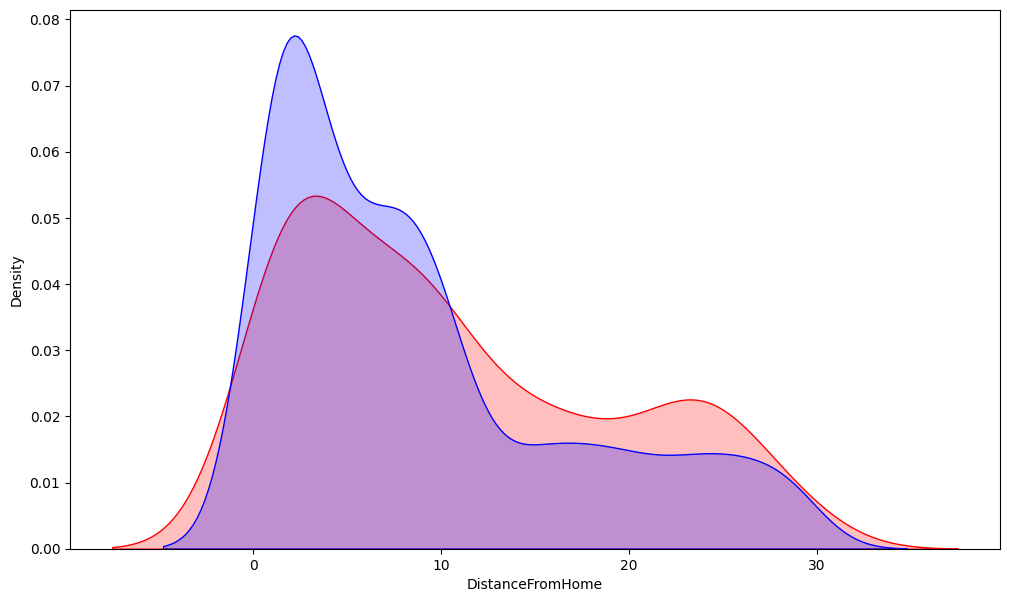

In [24]:
# Distribuição da distância do trabalho em relação àqueles que saíram ou ficaram:

plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcinários que saíram', fill = True, color = 'r');
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcinários que ficaram', fill = True, color = 'b');

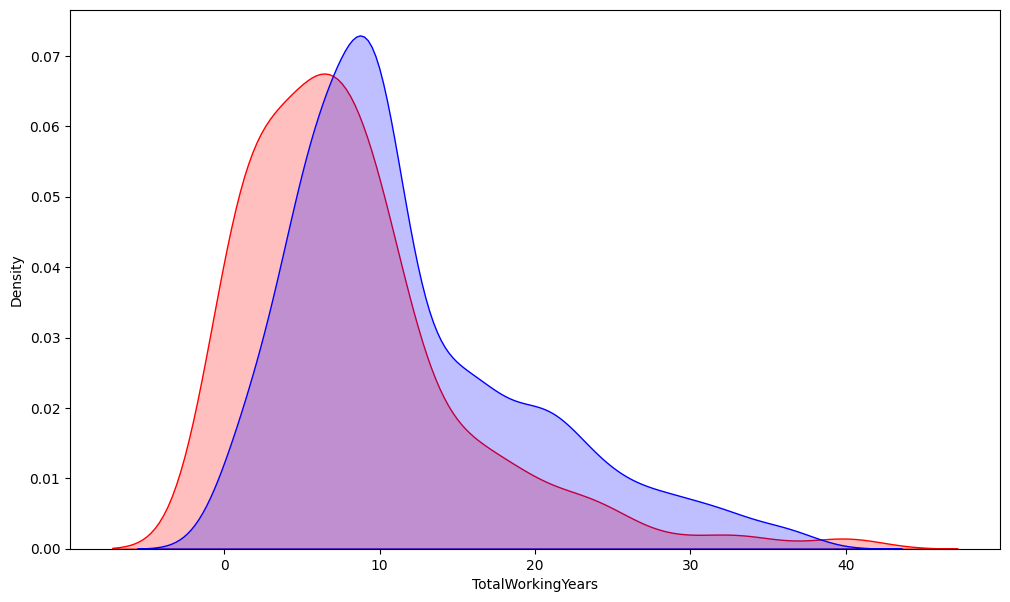

In [25]:
# Distribuição dos anos totais de trabalho em relação àqueles que saíram ou ficaram:

plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcinários que saíram', fill = True, color = 'r');
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcinários que ficaram', fill = True, color = 'b');

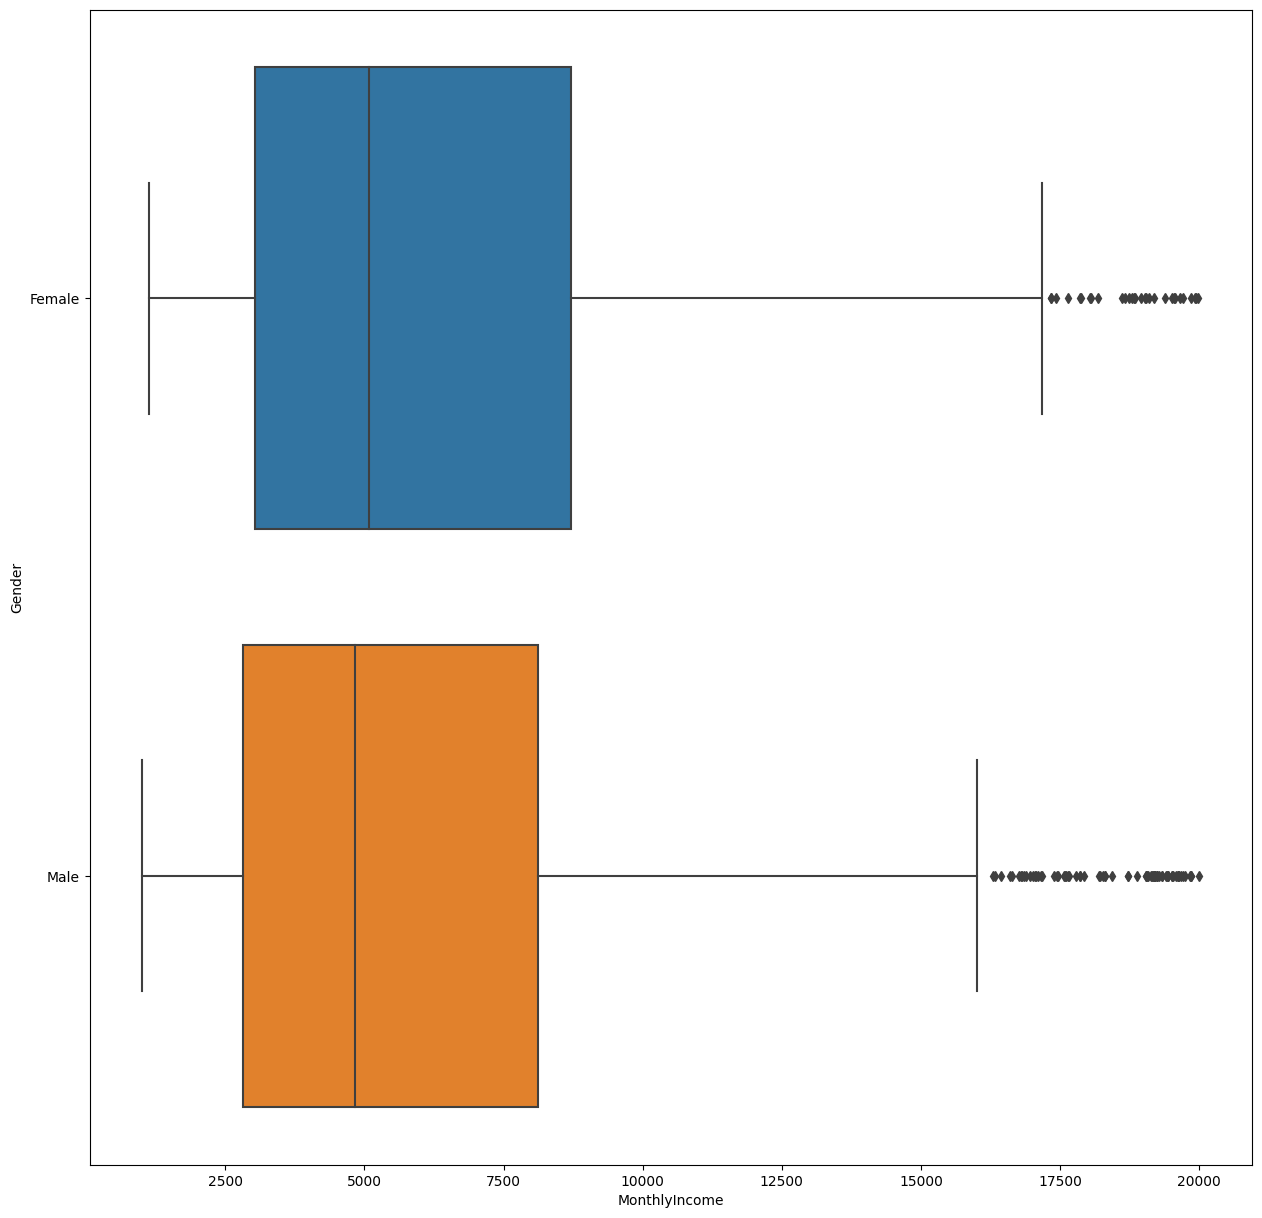

In [26]:
# Boxplot do salário mensal em relação ao gênero:

plt.figure(figsize=(15,15))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df);

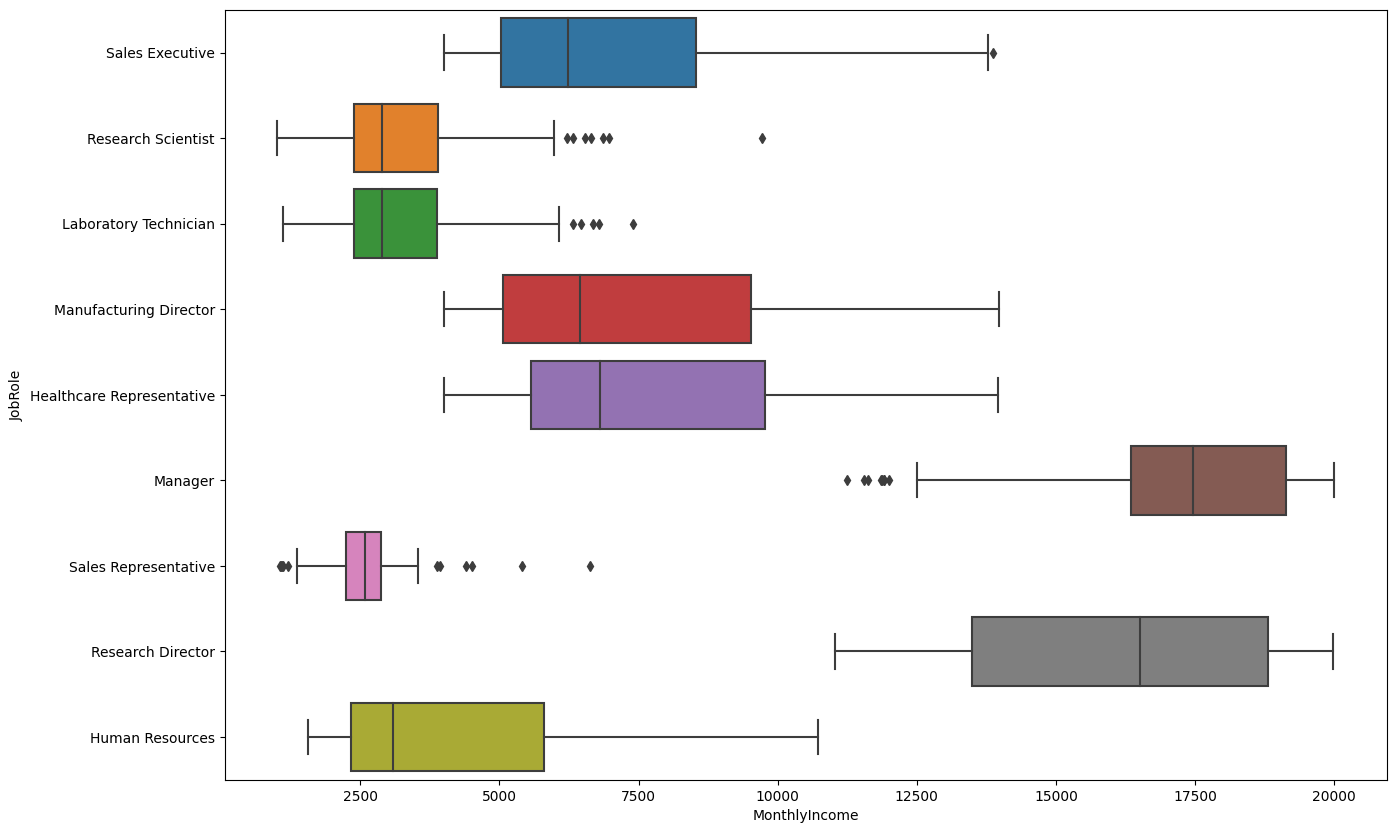

In [27]:
# Boxplot do salário mensal em relação ao cargo:

plt.figure(figsize=(15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df);

## Pré-processamento e bases de treinamento/teste

**Pré-processamento dos Dados**


Os dados foram pré-processados para serem adequados ao treinamento do modelo. Isso incluiu a criação de variáveis dummy para as características categóricas e a normalização das características numéricas.

In [28]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [29]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [30]:
X_cat.shape

(1470, 26)

In [31]:
X_cat = pd.DataFrame(X_cat)

In [32]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
# Não passar a variável referente a classe a ser prevista, que neste caso é a Attrition

X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [34]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all.values)

In [36]:
y = employee_df['Attrition']

**Divisão dos Dados em Treinamento e Teste**


Os dados foram divididos em conjuntos de treinamento e teste para o treinamento e avaliação do modelo de machine learning.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [38]:
X_train.shape, y_train

((1102, 50),
 1183    0
 174     0
 896     0
 225     0
 712     0
        ..
 213     0
 786     0
 1391    0
 1074    0
 644     0
 Name: Attrition, Length: 1102, dtype: int64)

In [39]:
X_test.shape, y_test

((368, 50),
 1324    0
 557     0
 1051    0
 256     0
 751     0
        ..
 23      0
 463     1
 151     0
 488     0
 1354    1
 Name: Attrition, Length: 368, dtype: int64)

## Regressão logística

**Regressão Logística**


Um modelo de regressão logística foi treinado utilizando os dados de treinamento e avaliado utilizando os dados de teste. Foram calculadas métricas de desempenho, como acurácia, matriz de confusão, precisão, recall e pontuação F1.

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logistic = LogisticRegression()

In [42]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
# Métricas de Desempenho

accuracy_score(y_test, y_pred)

0.8668478260869565

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[298,   6],
       [ 43,  21]])

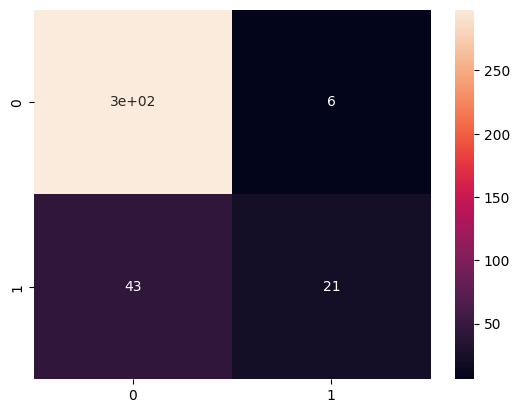

In [49]:
sns.heatmap(cm, annot=True);

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [56]:
# - Precision (Precisão): É a proporção de verdadeiros positivos (TP) em relação ao total de previsões positivas (TP + FP).
# Essa métrica mede a precisão do modelo em identificar corretamente os positivos.
#   Precision = TP / (TP + FP)

precision_score(y_test, y_pred)

0.7777777777777778

In [57]:
# - Recall (Recall ou Sensibilidade): É a proporção de verdadeiros positivos (TP) em relação ao total de casos positivos reais (TP + FN).
# Essa métrica mede a capacidade do modelo de identificar todos os casos positivos reais.
# Recall = TP / (TP + FN)

recall_score(y_test, y_pred)

0.328125

In [58]:
f1_score(y_test, y_pred, average='macro')

0.6927847346451999

- Precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- Recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- F1: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       304
           1       0.78      0.33      0.46        64

    accuracy                           0.87       368
   macro avg       0.83      0.65      0.69       368
weighted avg       0.86      0.87      0.84       368



**Precision (Precisão):** Com um valor de precisão aproximada de 78%, o modelo é capaz de identificar corretamente 78% dos funcionários que ele prevê como propensos a deixar a empresa. Em outras palavras, quando o modelo faz uma previsão de atrito, ele está correto em 78% das vezes. Isso indica uma capacidade razoável de evitar falsos positivos, o que é importante para não tomar medidas desnecessárias.


**Recall (Recall ou Sensibilidade):** Com um recall de 33%, o modelo é capaz de identificar corretamente aproximadamente 33% dos funcionários que realmente deixarão a empresa. Isso significa que o modelo pode perder alguns casos de atrito real, mas ainda é capaz de detectar uma parte significativa deles. Melhorar o recall pode ser uma área de foco para futuras iterações do modelo.


**F1 Score:** O F1 Score é a média harmônica entre precisão e recall. Com um valor aproximado de 46%, o modelo alcança um equilíbrio entre a precisão e a capacidade de detectar casos de atrito real. Esta métrica indica que o modelo é capaz de realizar uma classificação razoavelmente equilibrada, considerando ambas as métricas.

Em resumo, o modelo de Regressão Logística apresenta um bom desempenho geral, com uma precisão sólida, mas há margem para melhorar o recall para identificar mais casos de atrito real.

## Random forest

**Random Forest**


Um modelo de Random Forest foi treinado utilizando os dados de treinamento e avaliado utilizando os dados de teste. Foram calculadas métricas de desempenho semelhantes às da Regressão Logística.

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
# Métricas de Desempenho

accuracy_score(y_test, y_pred)

0.845108695652174

In [65]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[301,  54],
       [  3,  10]])

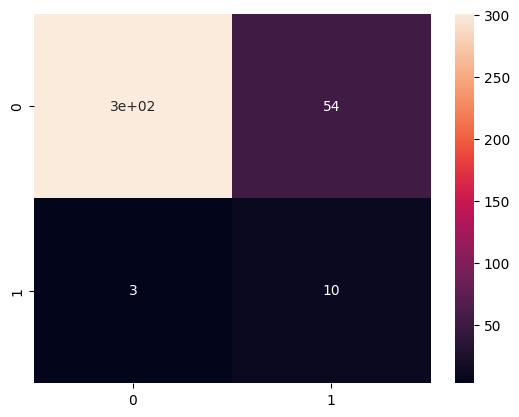

In [66]:
sns.heatmap(cm, annot=True);

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       304
           1       0.77      0.16      0.26        64

    accuracy                           0.85       368
   macro avg       0.81      0.57      0.59       368
weighted avg       0.83      0.85      0.80       368



Resultado pior, pricipalmente em Recall utilizando o algoritmo de RandomForest

## Redes neurais artificiais

- Quantos neurônios e quantas camadas? https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

**Redes Neurais Artificiais (TensorFlow/Keras)**


Uma rede neural artificial foi construída usando TensorFlow/Keras. O modelo foi treinado com os dados de treinamento e avaliado com os dados de teste. As métricas de desempenho foram calculadas.

In [68]:
import tensorflow as tf

In [69]:
X_train.shape

(1102, 50)

In [70]:
# Fórmula para definir quantidade de neurônios a serem utilizados na rede neural
# Número de entradas + número de saídas (uma probabilidade nesse cenário do RH)
(50 + 1) / 2

25.5

In [72]:
# Definição da arquitetura da rede neural

rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu', input_shape = (50,))) # 'relu' retorna zero para valores negativos e o próprio valor para positivos
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [73]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2601 (10.16 KB)
Trainable params: 2601 (10.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Compilação e Treinamento da Rede Neural

rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [75]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 2s 4ms/step - loss: 0.7306 - accuracy: 0.5109
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8430
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8430
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8430
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.8439
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8475
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8557
Epoch 8/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8693
Epoch 9/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8811
Epoch 10/200
35/35 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.8857
Epoch 11/

In [108]:
# Previsões e Métricas de Desempenho

y_pred = rede_neural.predict(X_test)
y_pred

12/12 [==============================] - 0s 3ms/step


array([[2.86323421e-16],
       [7.00961209e-07],
       [6.77783589e-08],
       [2.02997558e-06],
       [3.20434483e-05],
       [9.53379460e-03],
       [5.01939809e-11],
       [3.34241951e-04],
       [7.17643306e-11],
       [1.59810963e-17],
       [1.08087878e-03],
       [2.57165993e-07],
       [8.38194680e-10],
       [9.99983191e-01],
       [2.80114534e-07],
       [7.85210602e-07],
       [1.11478526e-11],
       [1.11626353e-08],
       [8.12727842e-04],
       [3.38841240e-08],
       [5.26563411e-11],
       [1.05092868e-09],
       [1.78459754e-08],
       [3.30576330e-11],
       [9.70392833e-09],
       [9.54163134e-01],
       [7.17166753e-04],
       [1.00000000e+00],
       [9.99004483e-01],
       [2.75384663e-11],
       [1.44601960e-04],
       [9.99736786e-01],
       [2.26151693e-12],
       [9.15032089e-01],
       [1.46843453e-12],
       [1.13707310e-05],
       [6.13776347e-12],
       [1.98648934e-07],
       [4.18295770e-07],
       [3.75812957e-11],


In [77]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[276,  28],
       [ 41,  23]])

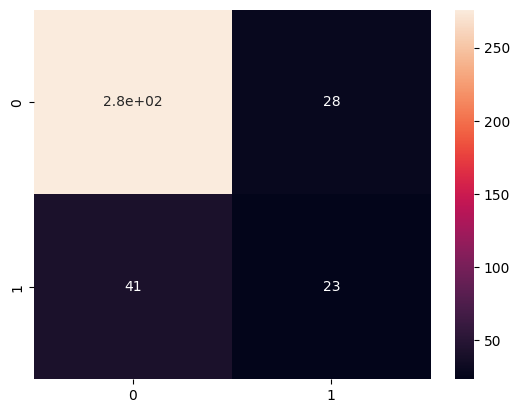

In [80]:
sns.heatmap(cm, annot=True);

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       304
           1       0.45      0.36      0.40        64

    accuracy                           0.81       368
   macro avg       0.66      0.63      0.64       368
weighted avg       0.80      0.81      0.80       368



## Salvando o classificador

O modelo de Regressão Logística foi selecionado como o modelo final devido ao seu melhor desempenho geral. O modelo e os objetos necessários para o pré-processamento dos dados foram salvos em um arquivo.

In [82]:
import pickle

In [84]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logistic], f)

**Simulação de Execução do Modelo**


Para simular a execução do modelo treinado, um novo registro foi preparado a partir dos dados da própria base de dados. Os objetos de pré-processamento foram carregados e utilizados para transformar o novo registro e fazer previsões.

In [91]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [92]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [93]:
# Para simular um registro novo, por conta dos diversos atributos, vamos buscar um registro da própria base de dados.

X_novo = employee_df.iloc[0:1]
X_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [94]:
x_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
x_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [95]:
x_cat_novo = encoder.transform(x_cat_novo).toarray()

In [96]:
x_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [97]:
x_cat_novo = pd.DataFrame(x_cat_novo)
x_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [98]:
x_numerical_novo = x_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
x_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5


In [100]:
X_all_novo = pd.concat([x_cat_novo, x_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [103]:
X_novo = min_max.transform(X_all_novo.values)
X_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [104]:
model.predict(X_novo)

array([1])

In [105]:
model.predict_proba(X_novo)

array([[0.43048011, 0.56951989]])

In [106]:
model.classes_

array([0, 1])

**Conclusão**


O projeto de previsão de classificação foi desenvolvido para ajudar o Departamento de Recursos Humanos a identificar funcionários propensos a deixar a empresa. Foram utilizados modelos de machine learning, como Regressão Logística, Random Forest e Redes Neurais Artificiais, para prever a probabilidade de atrito dos funcionários. O modelo de Regressão Logística apresentou o melhor desempenho em relação às métricas de avaliação.

O modelo treinado e os objetos de pré-processamento foram salvos para uso futuro, e uma simulação de execução do modelo foi demonstrada usando um novo registro da base de dados.

É importante ressaltar que a qualidade do modelo pode ser aprimorada com mais dados e ajustes nos hiperparâmetros. Além disso, a base de dados utilizada está desbalanceada, o que afeta o desempenho do modelo, e medidas adicionais podem ser tomadas para lidar com esse desbalanceamento. Desse modo, em breve investirei tempo para desenvolver um modelo v2 buscando esse aprimoramento.